С каждым годом зарплата растет на:  [9312.57512673]


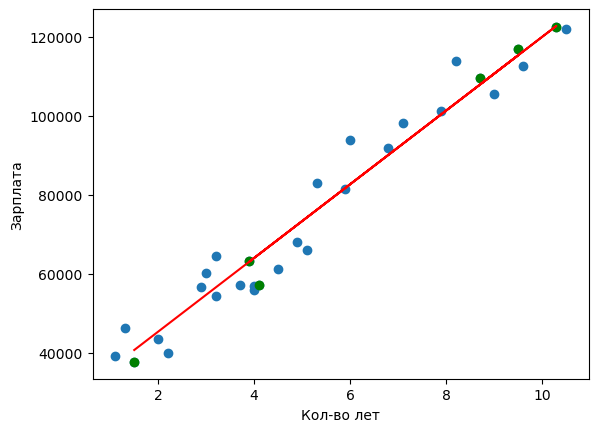

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Salary_Data.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("С каждым годом зарплата растет на: ", regressor.coef_)

y_pred = regressor.predict(x_test)

plt.scatter (df['YearsExperience'], df['Salary'], label = "Зависимость зарплаты от опыта работы")
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, y_pred, color = 'red')
plt.xlabel("Кол-во лет")
plt.ylabel("Зарплата")
plt.show()


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('Winequality-red.csv')
'''
sns.set(style='whitegrid', context='notebook')
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar']
sns.pairplot(df[cols], size = 2.5)
'''
#print(df)
#df.describe
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']]
#y = df[['alcohol','quality']]
y = df['alcohol']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(x_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df1)
print(metrics.mean_squared_error(y_test, y_pred))


                      Coefficient
fixed acidity            0.526833
volatile acidity         0.417112
citric acid              0.819103
residual sugar           0.279676
chlorides               -1.329141
free sulfur dioxide     -0.003914
total sulfur dioxide    -0.001784
density               -617.370212
pH                       3.749969
sulphates                1.296898
      Actual    Predict
1109    10.8  10.216609
1032     9.6   9.631488
1002    11.7  11.735999
487     10.0   9.727042
979     10.4  11.611776
...      ...        ...
794     12.5  11.686889
813     11.4  11.249196
1322    11.4  11.888456
704      9.7   9.579315
1023    12.3  11.165873

[320 rows x 2 columns]
0.3470864852398169
